# Project 5: Wrangle and Analyze Data

### Introduction

In the Juypeter Notebook, I will be performing data wrangling process by gathering, assessing and testing. Specifically for this project, I will wangle “WeRateDogs”, which is from Twitter data. After the gathering process, when accessing gathered data, I will be focused on its quality and tidiness. After data is gathered and accessed, I will then move forward to cleaning process. This process includes define, code and test. At the end of this project I will have cleaned data. 

### Gathering

In [186]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import time
import json
import re
import seaborn as sns
import requests
import matplotlib.pyplot as plt 

In [187]:
archived = pd.read_csv('twitter-archive-enhanced.csv')
archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [188]:
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [189]:
# Download and imbed the image-predictions file from Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('images.tsv', mode='wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv('images.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [190]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [191]:
# Given templete from Udacity
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'mVpj9UKK2wp1vkbHnCm8gdKFy'
consumer_secret = 'ryY6kXgVUCO8Ls3xzGpwEDErJmmMuEOFuy1LYH5jnN7qg60Evz'
access_token = '1283616331535978496-poVesPxQNMzrvqtQbriQ6kZdVQLD4b'
access_secret = 'BBvB3yuDJC6BPfsWyVZOWgOnAhlatbW63AG86HBXqrTiL'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archived.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json_finally.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [192]:
# Refered from https://github.com/StefaniePowazny/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
list_for_df = []

with open('tweet_json_finally.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)        
        tweet_id = json_data['id']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
        list_for_df.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count})

df = pd.DataFrame(list_for_df, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df.head()


# Save the dataFrame in file
# df.to_csv('tweet_json_result.csv', encoding = 'utf-8', index=False)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35883,7608
1,892177421306343426,30953,5632
2,891815181378084864,23297,3729
3,891689557279858688,39154,7782
4,891327558926688256,37413,8381


### Gathering Summary
> In gathering part of data wrangling, I gathered 3 data. They are Udacity provided twitter-archive-enhanced.csv, image prediction file, and  tweet_json_finally.txt (df) that I requested from Tweeter. Since we have all necessary data gathered, its ready to move to next section of data wrangling which is assessing. 

## Assessing

For this part of data wrangling, I will look for Quality (content issues) and Tidiness (structural) issues.

Quality Issues considrations: Completeness, Validity, Accuracy, Consistency

Tidy issues considerations: each variable forms a column, each observation forms row, each observational unit forms a table.


### Archived

In [193]:
archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### What I found in archived (Visually Detected Issues)
1. I found that there are already a lot of NaN values under in_reply_to_status_id, in_reply_to_status_id, in_reply_to_status_id, in_reply_to_status_id, in_reply_to_status_id.
2. I Knew that rating_denominator should be 10 and can't be more or less than that. I detected first incorrect rating_denominator in line 2335. We need further search if there is any other incorrectly formatted rating_denominator.
3. I detected that timestamp is in wrong format. There is no need to be +0000 at the end of time.
4. Under name column, I realized that there is dog name None or names that starts with a, quite, an, the etc. Need more research to find more inappropriate names and remove the names that are inappropriate with names. 
5. Lastly I realized that there is too repetitive columns (doggo,floofer,pupper,puppo). What if we combine those column into one new column? 
6. Source need to be in correct form of HTML. We need to clean HTML tags. 

In [194]:
archived.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

1. According to the data, I found out that in total number of 2356 rows, couple columns are missing values in great differences. Those columns are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. It is not good to have such a missing values in the data. This could be because there are lot of retweeted data. ( Programmatically detected) 

In [195]:
archived.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

2. According to the data above, there are lots of other rating_denominator other than 10. Although 10 is most common as it should be, this inconsistency data can make false result so we need to fix this. ( Programmatically detected) 

In [196]:
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

3. In order to detect the issues with wrong formatting, I used .info() function. As a result, for timestamp, retweeted_status_timestamp, I found that dtypes for those columns are object instead of datetime. We need to change the data type for timestamp in order to get accurate format. 

In [197]:
archived[~archived.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

4. As you can see from unique names, there are lot of names that doesn't sounds like a name such as such, a, quite, not etc. Although I found common in the names. All the appropriate names starts with capital letters like BeBe, DonDon, CeCe, DJ, Dayz. However, those with inappropriate names starts with all lower case. 

### Archived Assessing

##### Quality
1. Completeness
    - Couple columns are missing values in great differences. Those columns are 
    in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
    retweeted_status_timestamp.
    - Many retweeted columns have missing values.Plus retweeted needs to be removed because we 
    need only original data.
2. Validity
    - In Name column, I found invalid names for dogs such as such, a, quite, not etc.
3. Accuracy
    - Timestamp data type is object instead of datetime.(retweeted_status_timestamp	also has 
    wrong dtype but since we don't need retweeted we don't have to worry about this yet)
    - In_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, 
    retweeted_status_user_id column, the values should be in either string or integer instead 
    of float because float is decimals. (However, since we want to remove unnecesssary columns 
    and retweets, we are not going to change the data type. Instead, we will remove it.)
4. Consistency
    - In rating_denominator column, the denominator isn't consistency. Plus the demoninator 
    should be 10 
    - Sources is hard to recognized.
    
##### Tidiness
1. In doggo, floofer, pupper, puppo columns we need to put all those as values in one single column so it is easier to view. 

### Image_Prediction

In [198]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True
1737,821886076407029760,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,1,golden_retriever,0.266238,True,cocker_spaniel,0.223325,True,Irish_setter,0.151631,True
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1943,861383897657036800,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,1,Cardigan,0.771008,True,Pembroke,0.137174,True,French_bulldog,0.063309,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
727,686377065986265092,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,1,German_shepherd,0.830816,True,Leonberg,0.076325,True,bloodhound,0.037449,True
688,684177701129875456,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,chow,0.334783,True,German_shepherd,0.162647,True,golden_retriever,0.138612,True


2. I visually detected that under p1, p2, and p3 the dog's breed name is written inconsistently. Dog's breed name should be written in all lower case.

In [199]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [200]:
image_prediction['jpg_url'].duplicated().sum()

66

In [201]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [202]:
image_prediction['tweet_id'].duplicated().sum()

0

1. I searched if there is any duplicated values for each columns that their values shouldn't be duplicated. After programmatically researched I found that there are 66 duplciated jpg_url.

### Image_prediction Assessing

##### Quality
1. Validity 
    - There are 66 duplicated jpg_url which is the image of a dog. Duplicated pictures is not 
    necessary. (Programmatically detected) 
2. Consistency
    - Under P1, P2, and P3 columns, dog's names aren't consistently written in all lowercase, 
    typically dog's breed name shouldn't be capitalized.  

### Json (df)

In [203]:
df.sample(10)

,tweet_id,favorite_count,retweet_count
280,838083903487373313,17483,3093
907,754449512966619136,3736,729
2120,669926384437997569,358,92
815,767754930266464257,16008,5387
1940,673345638550134785,2401,1197
1619,683857920510050305,3754,1105
147,862457590147678208,19414,4598
551,801958328846974976,7849,1738
189,854482394044301312,28293,6554
509,808838249661788160,10227,3069


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [205]:
df['tweet_id'].duplicated().sum()

0

### Json(df) Assessing
#### Tidiness
1. In df table, I haven't detected any issues with Quality. However, so far, I have seen 
   tweet_id columns in three all tables. We need to join all three tables together and drop 
   the duplicated columns if necessary. This process will minimize the tables and we can have 
   one bigger dataset.

## Assessing Conclusion

### Archived Assessing

##### Quality
1. Completeness
    - Couple columns are missing values in great differences. Those columns are 
    in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
    retweeted_status_timestamp.
    - Many retweeted columns have missing values.Plus retweeted needs to be removed because we 
    need only original data.
2. Validity
    - In Name column, I found invalid names for dogs such as such, a, quite, not etc.
3. Accuracy
    - Timestamp data type is object instead of datetime.(retweeted_status_timestamp	also has 
    wrong dtype but since we don't need retweeted we don't have to worry about this yet)
    - In_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, 
    retweeted_status_user_id column, the values should be in either string or integer instead 
    of float because float is decimals. (However, since we want to remove unnecesssary columns 
    and retweets, we are not going to change the data type. Instead, we will remove it.)
4. Consistency
    - In rating_denominator column, the denominator isn't consistency. Plus the demoninator 
    should be 10 
    - Sources is hard to recognized.
    
##### Tidiness
1. In doggo, floofer, pupper, puppo columns we need to put all those as values in one single column so it is easier to view. 

### Image_prediction Assessing

##### Quality
1. Validity 
    - There are 66 duplicated jpg_url which is the image of a dog. Duplicated pictures is not 
    necessary. (Programmatically detected) 
2. Consistency
    - Under P1, P2, and P3 columns, dog's names aren't consistently written in all lowercase, 
    typically dog's breed name shouldn't be capitalized.  
    
### Json(df) Assessing

#### Tidiness
1. In df table, I haven't detected any issues with Quality. However, so far, I have seen 
   tweet_id columns in three all tables. We need to join all three tables together and drop 
   the duplicated columns if necessary. This process will minimize the tables and we can have 
   one bigger dataset.


## Cleaning

In [206]:
archived_clean = archived.copy()
image_prediction_clean = image_prediction.copy()
df_clean = df.copy()

#### Define

1. Drop the columns that aren't necessary to this analysis. Those columns are in_reply_to_status_id, in_reply_to_user_id.

#### Code

In [207]:
archived_clean=archived_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [208]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 276.2+ KB


Explain: I removed in_reply_to_status_id, in_reply_to_user_id. So now archived_clean has 15 columns total instead of 17 columns. 

#### Define

2. Remove Retweeted columns. 

#### Code

In [209]:
archived_clean=archived_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [210]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


Explain: Again, I dropped retweeted columns. These columns aren't necessary because retweeted data can cause many redundancy in results. 

#### Define

3. Name column values needs to be more appropriate with dog's name.

#### Code

In [211]:
# Refered from https://github.com/chelseymarie6/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
archived_clean.name = archived_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [212]:
archived_clean.name.sample(10)

206         Aspen
870          None
980          Lucy
2185         Ruby
2308         Jeph
817     Sebastian
1027        Arlen
1726        Sammy
373        Beebop
1940         None
Name: name, dtype: object

Explain: I realized all names starts with lower case has inapproprite names. So I replaced all lower case name to "None". 

#### Define

4. In rating_denominator column, the denominator isn't consistency. Denominator should be 10. 

In [213]:
archived_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Code

In [214]:
archived_clean['rating_denominator'] = 10

#### Test

In [215]:
archived_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

Explain: There were lot of denominator other than 10. However, denominator should be set to 10. So I used the code above to make all rating denominator 10. 

#### Define

5. Drop 66 duplicated jpg_url in image_predictions. 

#### Code

In [216]:
image_prediction_clean.jpg_url.drop_duplicates(keep='first',inplace = True)

#### Test

In [217]:
image_prediction_clean['jpg_url'].duplicated().sum()

0

Explain: All duplicated values in jpg_url column is all removed.

#### Define

6. Combine doggo,floofer,pupper,puppo columns into ranking columns to minimize columns

#### Code

In [218]:
archived_clean['ranking'] = archived_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [219]:
archived_clean[['ranking', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,ranking,doggo,floofer,pupper,puppo
812,NaN,None,None,None,None
1635,pupper,None,None,None,None
2031,NaN,None,None,None,None
547,NaN,None,None,None,None
175,NaN,None,None,None,None


In [220]:
archived_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [221]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
ranking               399 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


In [222]:
archived_clean.ranking.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: ranking, dtype: int64

Explain: I made one extra column named with ranking. Then I merged all results from 4 stage dogs into ranking column so that it is easiler to view. 

#### Define

7. Timestamp data type is object instead of datetime.

In [223]:
archived_clean.timestamp.sample(5)

1610    2016-01-08 18:43:29 +0000
1083    2016-06-03 01:07:16 +0000
1894    2015-12-10 00:10:43 +0000
1581    2016-01-13 04:10:18 +0000
190     2017-04-22 18:55:51 +0000
Name: timestamp, dtype: object

#### Code

In [224]:
archived_clean['timestamp'] = pd.to_datetime(archived_clean['timestamp'])

#### Test

In [225]:
archived_clean.timestamp.sample(5)

470    2017-01-05 01:20:46
1582   2016-01-13 03:12:26
2108   2015-11-28 04:03:11
1827   2015-12-14 15:57:56
76     2017-06-23 01:10:23
Name: timestamp, dtype: datetime64[ns]

In [226]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
ranking               399 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.7+ KB


Explain: In opposite to object data type for timestamp, data type datetime removed +0000 numbers at the end of each values. After cleaning, the data look much more cleaned.

#### Define

8. Under P1, P2, and P3 columns, dog's names aren't consistently written in all lowercase, typically dog's breed name shouldn't be capitalized. 

#### Code

In [227]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.lower()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.lower()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.lower()


#### Test

In [228]:
image_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,labrador_retriever,0.184172,True,english_setter,0.073482,True
272,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
269,670815497391357952,https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg,1,american_staffordshire_terrier,0.919714,True,staffordshire_bullterrier,0.073430,True,bull_mastiff,0.000906,True


Explain: I changed all p1, p2, p3 dog's breed name into all lowercase. 

#### Define

9. Clean Messy HTML tags. 

#### Code

In [229]:
# Refered from https://ashleygingeleski.com/tag/udacity/
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
archived_clean['source'] = archived_clean['source'].apply(remove_html_tags)

#### Test

In [230]:
archived_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,ranking
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


Explain: I changed all messy HTML tags to readable text.

#### Define

10. Merge all 3 tables (archived, image prediction, df) because it is better to view. 

#### Code

In [231]:
new_tweet = pd.merge(archived_clean, image_prediction_clean, on='tweet_id', how='inner')
new_tweet = pd.merge(new_tweet, df_clean, on='tweet_id', how='inner')

#### Test 

In [232]:
new_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id              2059 non-null int64
timestamp             2059 non-null datetime64[ns]
source                2059 non-null object
text                  2059 non-null object
expanded_urls         2059 non-null object
rating_numerator      2059 non-null int64
rating_denominator    2059 non-null int64
name                  2059 non-null object
ranking               334 non-null object
jpg_url               2059 non-null object
img_num               2059 non-null int64
p1                    2059 non-null object
p1_conf               2059 non-null float64
p1_dog                2059 non-null bool
p2                    2059 non-null object
p2_conf               2059 non-null float64
p2_dog                2059 non-null bool
p3                    2059 non-null object
p3_conf               2059 non-null float64
p3_dog                2059 non-null bool
favorite_count        2059 non-nu

Explain: I merged all 3 tables into one "New_tweet" table by using tweet_id. This makes it easier to see it in one table rather then keeping 3 tables. 

### Storing, Analyzing, and Visualizing Data

### Storing

In [233]:
# Refered from https://github.com/chelseymarie6/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
new_tweet.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [234]:
new_tweet = pd.read_csv('twitter_archive_master.csv')
new_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id              2059 non-null int64
timestamp             2059 non-null object
source                2059 non-null object
text                  2059 non-null object
expanded_urls         2059 non-null object
rating_numerator      2059 non-null int64
rating_denominator    2059 non-null int64
name                  2059 non-null object
ranking               334 non-null object
jpg_url               2059 non-null object
img_num               2059 non-null int64
p1                    2059 non-null object
p1_conf               2059 non-null float64
p1_dog                2059 non-null bool
p2                    2059 non-null object
p2_conf               2059 non-null float64
p2_dog                2059 non-null bool
p3                    2059 non-null object
p3_conf               2059 non-null float64
p3_dog                2059 non-null bool
favorite_count        2059 non-null int64

#### 1. What is most common dog ranking?

In [235]:
new_tweet['ranking'].value_counts()


pupper     230
doggo       73
puppo       28
floofer      3
Name: ranking, dtype: int64

Text(0.5,0,'Ranking')

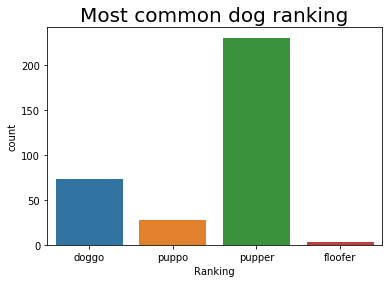

In [236]:
sns.countplot(data=new_tweet, x='ranking')
plt.title('Most common dog ranking', size=20)
plt.xlabel('Ranking')

#### 2. What is relationship between  favorite_count and retweet_count

Text(0.5,1,'Favorites VS Retweets')

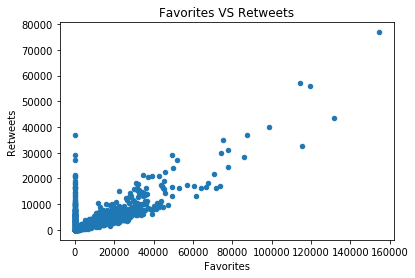

In [237]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorites VS Retweets')

#### 3. What is most common dog's name?

In [250]:
new_tweet.name.value_counts()

None         673
Cooper        10
Penny         10
Oliver        10
Charlie       10
Tucker        10
Lucy           9
Bo             8
Lola           8
Sadie          8
Winston        8
Toby           7
Daisy          7
Koda           6
Stanley        6
Rusty          6
Bailey         6
Scout          6
Milo           6
Dave           6
Bella          6
Jax            6
Alfie          5
Louis          5
Buddy          5
Chester        5
Leo            5
Larry          5
Oscar          5
George         4
            ... 
Buckley        1
Layla          1
Mauve          1
Pancake        1
Murphy         1
Tess           1
Diogi          1
Gordon         1
Erik           1
Willy          1
Georgie        1
Trip           1
Sid            1
Bookstore      1
Nollie         1
Dobby          1
Crumpet        1
Raphael        1
Lilah          1
Pumpkin        1
Jaycob         1
Ulysses        1
Dixie          1
Leela          1
Lassie         1
Augie          1
Pawnd          1
Butters       

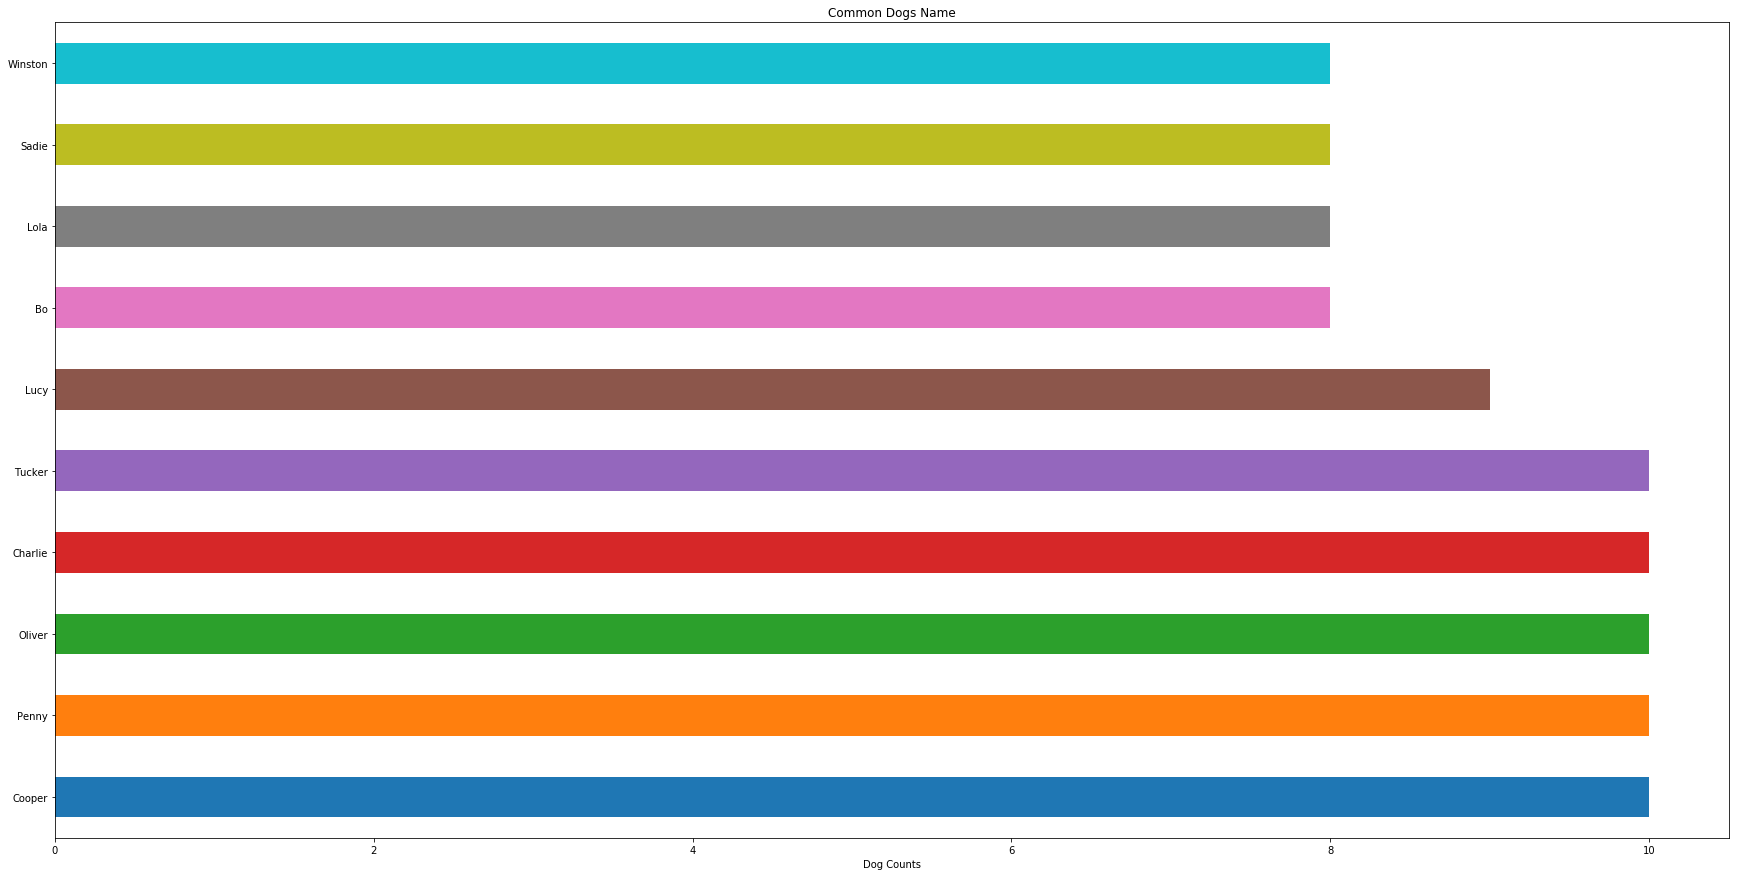

In [259]:
new_tweet.name.value_counts()[1:11].plot('barh', figsize=(30,15), title='Common Dogs Name').set_xlabel("Dog Counts");


### References

https://github.com/StefaniePowazny/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
https://github.com/chelseymarie6/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
https://ashleygingeleski.com/tag/udacity/
https://www.kite.com/python/answers/how-to-make-a-pandas-dataframe-string-column-lowercase-in-python#:~:text=Use%20str.,a%20DataFrame%20string%20column%20lowercase&text=lower()%20to%20make%20all,%5B%22first_column%22%5D%20lowercase